In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

In [2]:
ser = Service('../chromedriver/chromedriver.exe')

driver = webdriver.Chrome(service = ser)

In [3]:
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 

driver.get(url)

In [4]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

In [5]:
songs = soup.select('form > table > tbody > tr')

In [6]:
song = songs[0]
rank = song.select('.rank')[0].text.strip()
category = song.select('.category')[0].text.strip()
name = song.select('a')[1].text.strip()
subscriber = song.select('.subscriber_cnt')[0].text
view = song.select('.view_cnt')[0].text
video = song.select('.video_cnt')[0].text

In [7]:
songs = soup.select('form > table > tbody > tr')
rank_list = []

for song in songs:
    rank = song.select('.rank')[0].text.strip()
    category = song.select('.category')[0].text.strip()
    name = song.select('a')[1].text.strip()
    subscriber = song.select('.subscriber_cnt')[0].text
    view = song.select('.view_cnt')[0].text
    video = song.select('.video_cnt')[0].text
    rank_list.append([rank, category, name, subscriber, view, video])


rank_list_df = pd.DataFrame(rank_list, 
                           columns = ['rank', 'category', 'name', 'subscriber', 'view', 'video'])
rank_list_df.to_excel('./files/youtube_rank_class_practice.xlsx',
                     index = False)

#### 데이터 시각화하기

In [8]:
from matplotlib import rc, font_manager

In [9]:
path = ('c:/Windows/Fonts/malgun.ttf')
font_name = font_manager.FontProperties(fname = path).get_name()
# font_name
rc('font', family = font_name)

In [10]:
df = pd.read_excel('./files/youtube_rank_class_practice.xlsx')

df.head()

,rank,category,name,subscriber,view,video
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개"
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개"
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


In [11]:
df['category'].value_counts()

[음악/댄스/가수]     37
[키즈/어린이]       22
[음식/요리/레시피]    14
[TV/방송]        13
[뉴스/정치/사회]      3
[BJ/인물/연예인]     3
[애완/반려동물]       2
[해외]            1
[미분류]           1
[회사/오피셜]        1
[패션/미용]         1
[게임]            1
[취미/라이프]        1
Name: category, dtype: int64

In [12]:
# subscriber의 data type이 object로 데이터분석을 위해 int형으로 전처리
df['subscriber_replaced'] = df['subscriber'].str.replace('만','0000').astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 100 non-null    int64 
 1   category             100 non-null    object
 2   name                 100 non-null    object
 3   subscriber           100 non-null    object
 4   view                 100 non-null    object
 5   video                100 non-null    object
 6   subscriber_replaced  100 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 5.2+ KB


In [13]:
pivot_df = df.pivot_table(values = 'subscriber_replaced',
                          index = 'category',
                          aggfunc = ['sum','count'])

pivot_df.head()

,sum,count
,subscriber_replaced,subscriber_replaced
category,,
[BJ/인물/연예인],13580000,3
[TV/방송],87570000,13
[게임],4260000,1
[뉴스/정치/사회],20430000,3
[미분류],6550000,1


In [14]:
pivot_df.columns = ['subscriber_sum', 'subscriber_count']
pivot_df = pivot_df.reset_index()
pivot_df

,category,subscriber_sum,subscriber_count
0,[BJ/인물/연예인],13580000,3
1,[TV/방송],87570000,13
2,[게임],4260000,1
3,[뉴스/정치/사회],20430000,3
4,[미분류],6550000,1
5,[애완/반려동물],8080000,2
6,[음식/요리/레시피],92900000,14
7,[음악/댄스/가수],535900000,37
8,[취미/라이프],4000000,1
9,[키즈/어린이],163730000,22


In [15]:
pivot_df = pivot_df.sort_values(by = 'subscriber_sum',
                                ascending=False)
pivot_df = pivot_df.reset_index(drop = True)
pivot_df

,category,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535900000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87570000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13580000,3
6,[애완/반려동물],8080000,2
7,[해외],7810000,1
8,[미분류],6550000,1
9,[회사/오피셜],5950000,1


##### 파이차트 그리기

In [16]:
import matplotlib.pyplot as plt

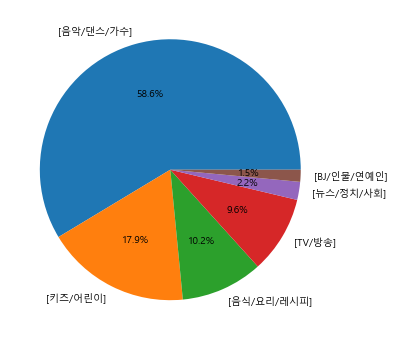

In [20]:
plt.figure(figsize = (6,6))
plt.pie(pivot_df.head(6)['subscriber_sum'], 
        labels=pivot_df.head(6)['category'], 
        autopct = '%1.1f%%')
plt.show()